<a href="https://colab.research.google.com/github/Nahidjc/Machine_Learning/blob/main/weapon_detection_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v6.0-266-g07221f1 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.2/78.2 GB disk)


In [5]:
import torch
torch.cuda.is_available()

True

In [3]:
!unzip -q ../main_data.zip -d ../

In [33]:
!zip -r ../yolov5-d ../

  adding: ../ (stored 0%)
  adding: ../.config/ (stored 0%)
  adding: ../.config/configurations/ (stored 0%)
  adding: ../.config/configurations/config_default (deflated 15%)
  adding: ../.config/active_config (stored 0%)
  adding: ../.config/.last_update_check.json (deflated 22%)
  adding: ../.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: ../.config/config_sentinel (stored 0%)
  adding: ../.config/.last_survey_prompt.yaml (stored 0%)
  adding: ../.config/logs/ (stored 0%)
  adding: ../.config/logs/2022.02.01/ (stored 0%)
  adding: ../.config/logs/2022.02.01/14.31.16.993813.log (deflated 53%)
  adding: ../.config/logs/2022.02.01/14.30.57.022317.log (deflated 91%)
  adding: ../.config/logs/2022.02.01/14.31.33.364834.log (deflated 86%)
  adding: ../.config/logs/2022.02.01/14.31.58.218326.log (deflated 54%)
  adding: ../.config/logs/2022.02.01/14.31.57.576848.log (deflated 54%)
  adding: ../.config/logs/2022.02.01/14.31.40.709264.log (deflated 54%)
  adding: ../.config/gce (stored

In [4]:
!python train.py --img 640 --batch 2 --epochs 60 --data custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=60, batch_size=2, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-266-g07221f1 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0

In [8]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.25 --source ../sarif.jpg

detect: weights=['runs/train/exp/weights/last.pt'], source=../sarif.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-266-g07221f1 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/sarif.jpg: 640x480 1 Chopper, Done. (0.030s)
Speed: 0.7ms pre-process, 30.1ms inference, 2.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


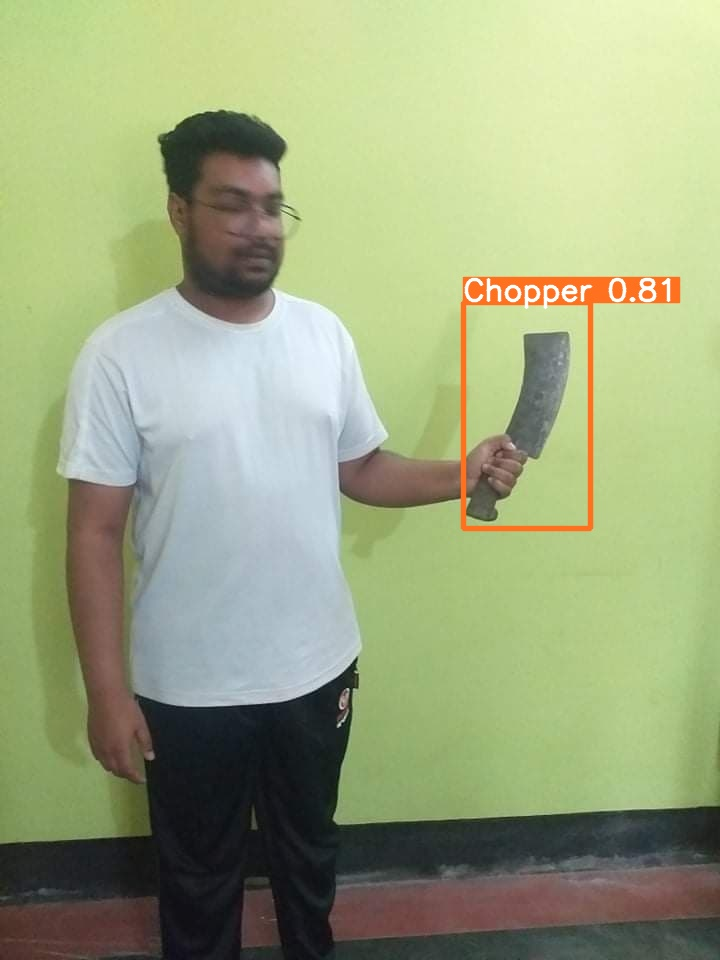

In [9]:
display.Image(filename='runs/detect/exp2/sarif.jpg', width=600)

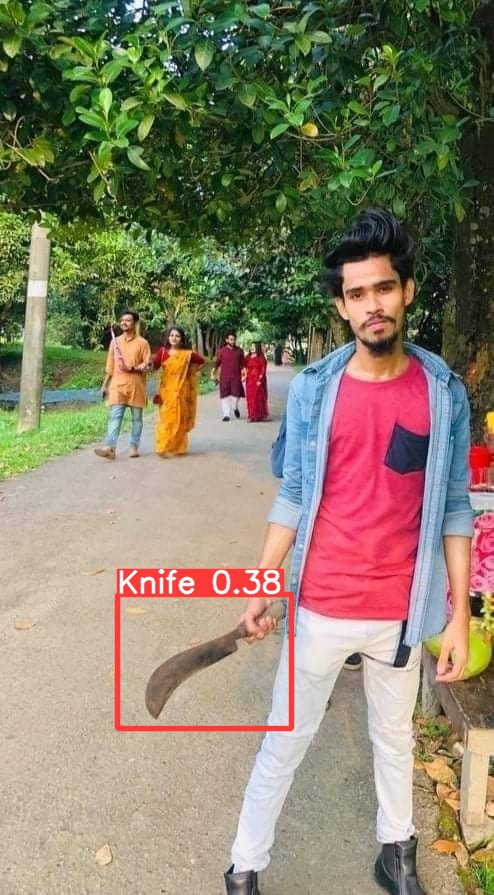

In [12]:
display.Image(filename='runs/detect/exp/test.jpg', width=600)

In [13]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.25 --source ../test1.jpg

detect: weights=['runs/train/exp/weights/last.pt'], source=../test1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-266-g07221f1 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test1.jpg: 448x640 1 Knife, Done. (0.028s)
Speed: 0.5ms pre-process, 28.1ms inference, 2.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


In [17]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.25 --source ../knife2.jpg

detect: weights=['runs/train/exp/weights/last.pt'], source=../knife2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-266-g07221f1 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/knife2.jpg: 448x640 1 Knife, Done. (0.029s)
Speed: 0.7ms pre-process, 28.6ms inference, 2.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


In [30]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source ../man-gun.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=../man-gun.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-266-g07221f1 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/man-gun.jpg: 640x512 1 Gun, Done. (0.030s)
Speed: 0.6ms pre-process, 30.4ms inference, 2.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp16


In [36]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.25 --source ../gun2.jpg

detect: weights=['runs/train/exp/weights/last.pt'], source=../gun2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-266-g07221f1 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/gun2.jpg: 448x640 2 Guns, Done. (0.028s)
Speed: 0.5ms pre-process, 28.3ms inference, 2.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp18


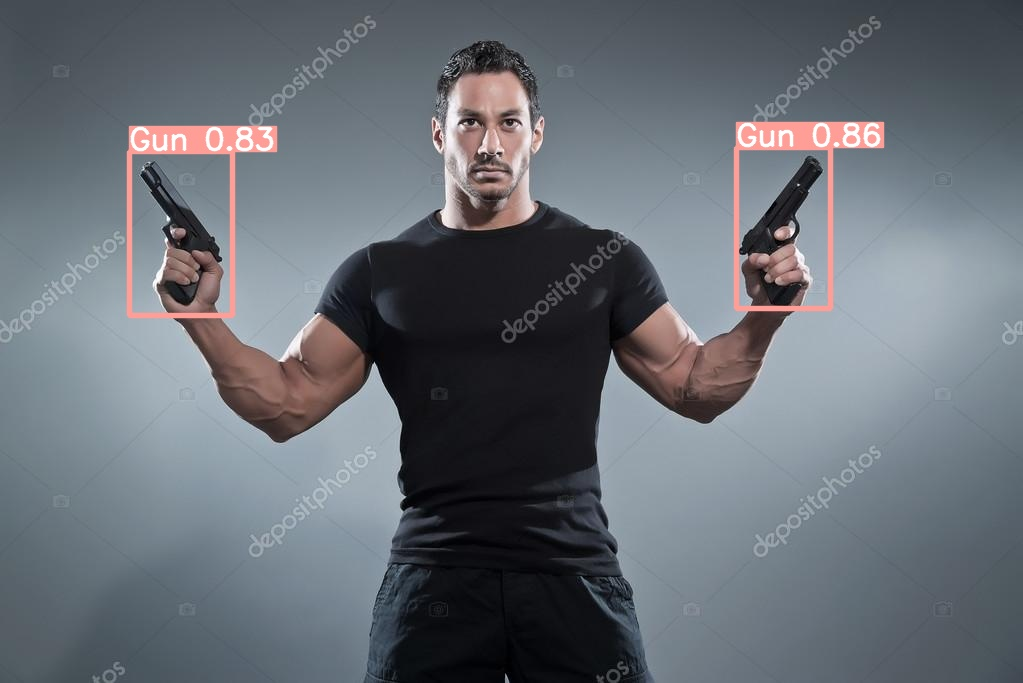

In [37]:
display.Image(filename='runs/detect/exp18/gun2.jpg', width=600)

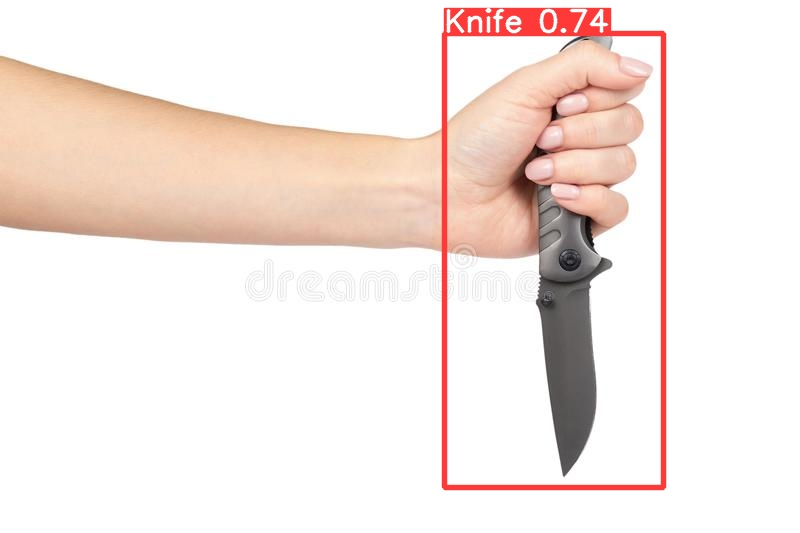

In [18]:
display.Image(filename='runs/detect/exp7/knife2.jpg', width=600)

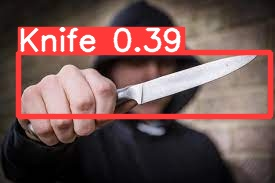

In [14]:
display.Image(filename='runs/detect/exp4/test1.jpg', width=600)

In [15]:
!python detect.py --weights runs/train/exp/weights/last.pt --img 640 --conf 0.25 --source ../knife.mp4

detect: weights=['runs/train/exp/weights/last.pt'], source=../knife.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-266-g07221f1 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/2067) /content/knife.mp4: 384x640 1 Gun, Done. (0.027s)
video 1/1 (2/2067) /content/knife.mp4: 384x640 1 Gun, Done. (0.027s)
video 1/1 (3/2067) /content/knife.mp4: 384x640 1 Gun, Done. (0.027s)
video 1/1 (4/2067) /content/knife.mp4: 384x640 1 Gun, Done. (0.027s)
video 1/1 (5/2067) /content/knife.mp4: 384x640 1 Gun, Done. (0.025s)
video 1/1 (6/2067) /content/knife.m

In [26]:
!python detect.py --source 0

detect: weights=yolov5s.pt, source=0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-266-g07221f1 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
cv2.imshow() is disabled in Google Colab environments
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (802) open VIDEOIO ERROR: V4L: can't open camera by index 0
Traceback (most recent call last):
  File "detect.py", line 257, in <module>
    main(opt)
  File "detect.py", line 252, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 28, in decorate_contex